1. stat-cont
2. stat-bmp9
3. flow-cont
4. flow-bmp9

- Q1: look at the 1vs2  VS 1vs3:
   -  Which of the differential regions are common?: A
   -  Which of the differential regions are annotated with the same gene BUT not exactly the same regions? : B
|

In [7]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.1                         
year           2022                        
month          06                          
day            23                          
svn rev        82513                       
language       R                           
version.string R version 4.2.1 (2022-06-23)
nickname       Funny-Looking Kid           

In [8]:
packageVersion("GenomicRanges")

[1] ‘1.48.0’

In [9]:
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



In [10]:
flow_cont_VS_stat_cont = read.table("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/flow_cont_VS_stat_cont_TSS_annotated_geneSymbol.bed", sep = "\t", header = F)
head(flow_cont_VS_stat_cont)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,923802,924203,SAMD11,-0.6917031,0.0029030722,0.022116163,7.257583,6.718923,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
2,chr1,930611,931012,SAMD11,0.8497081,0.0025110344,0.019965822,5.786526,6.259011,5.079313,chr1,923926,923927,ENSG00000187634.11,0,+,6685
3,chr1,938076,938477,SAMD11,-0.6237558,0.0019482280,0.016588904,7.528921,7.096159,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
4,chr1,973718,974119,PLEKHN1,0.8809586,0.0031662308,0.023530886,5.848033,6.395402,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223
5,chr1,1032933,1033334,AGRN,-0.7445450,0.0003155041,0.004143038,8.212570,7.683965,8.598580,chr1,1020121,1020122,ENSG00000188157.14,0,+,12812
6,chr1,1040639,1041040,AGRN,-0.6362453,0.0046353932,0.030801001,8.702365,8.253828,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518


In [11]:
stat_bmp9_VS_stat_cont = read.table( "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/stat_bmp9_VS_stat_cont_TSS_annotated_geneSymbol.bed", sep = "\t", header = F)
head(stat_bmp9_VS_stat_cont, 20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,910190,910591,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336
2,chr1,921022,921423,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504
3,chr1,923802,924203,SAMD11,-1.1629176,2.520596e-07,2.974507e-05,7.101950,6.210326,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
4,chr1,925466,925867,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540
5,chr1,941593,941994,NOC2L,-0.6583104,1.240086e-03,1.926971e-02,6.970025,6.486176,7.331718,chr1,959309,959310,ENSG00000188976.10,0,-,17316
6,chr1,942434,942835,NOC2L,-0.8610278,4.864304e-05,1.897477e-03,6.774891,6.180369,7.194684,chr1,959309,959310,ENSG00000188976.10,0,-,16475
7,chr1,973718,974119,PLEKHN1,-0.8285726,2.046859e-03,2.684872e-02,4.399677,3.484354,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223
8,chr1,1021041,1021442,AGRN,-0.8417360,2.281448e-05,1.057730e-03,7.382121,6.801775,7.794845,chr1,1020121,1020122,ENSG00000188157.14,0,+,920
9,chr1,1024633,1025034,AGRN,-0.7330179,1.310156e-03,2.000868e-02,6.282382,5.735386,6.678055,chr1,1020121,1020122,ENSG00000188157.14,0,+,4512


In [12]:
flow_cont_VS_stat_cont_gr = makeGRangesFromDataFrame(flow_cont_VS_stat_cont,                         
                         keep.extra.columns=T,
                        ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field=c("V1"),
                         start.field="V2",
                         end.field=c("V3"),
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)

In [13]:
stat_bmp9_VS_stat_cont_gr = makeGRangesFromDataFrame(stat_bmp9_VS_stat_cont,
                          
                         keep.extra.columns=T,
                         ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field=c("V1"),
                         start.field="V2",
                         end.field=c("V3"),
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)

In [14]:
stat_bmp9_VS_stat_cont_gr

GRanges object with 23267 ranges and 14 metadata columns:
          seqnames              ranges strand |          V4        V5
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]     chr1       910190-910591      * |      SAMD11 -0.881419
      [2]     chr1       921022-921423      * |      SAMD11 -1.208391
      [3]     chr1       923802-924203      * |      SAMD11 -1.162918
      [4]     chr1       925466-925867      * |      SAMD11 -0.920878
      [5]     chr1       941593-941994      * |       NOC2L -0.658310
      ...      ...                 ...    ... .         ...       ...
  [23263]     chrX 154449482-154449883      * |      FAM50A -0.953814
  [23264]     chrX 154459070-154459471      * |      PLXNA3 -0.523028
  [23265]     chrX 154486448-154486849      * |       UBL4A -1.151431
  [23266]     chrX 155010122-155010523      * |      FUNDC2  0.974908
  [23267]     chrX 155637639-155638040      * |       TMLHE  0.704521
                   V6          V

## Which of the differential regions are common?: A

In [15]:
common_regions = subsetByOverlaps(stat_bmp9_VS_stat_cont_gr, flow_cont_VS_stat_cont_gr)

In [16]:
common_regions

GRanges object with 6271 ranges and 14 metadata columns:
         seqnames              ranges strand |          V4        V5
            <Rle>           <IRanges>  <Rle> | <character> <numeric>
     [1]     chr1       923802-924203      * |      SAMD11 -1.162918
     [2]     chr1       973718-974119      * |     PLEKHN1 -0.828573
     [3]     chr1     1059451-1059852      * |      RNF223 -0.705584
     [4]     chr1     1079385-1079786      * |      RNF223 -0.875508
     [5]     chr1     1179347-1179748      * |      TTLL10 -0.952930
     ...      ...                 ...    ... .         ...       ...
  [6267]     chrX 139875814-139876215      * |      ATP11C  0.498579
  [6268]     chrX 141673912-141674313      * |      SPANXD  0.906304
  [6269]     chrX 150521881-150522282      * |        MTM1  0.870914
  [6270]     chrX 153380568-153380969      * |      PNMA6E -0.730773
  [6271]     chrX 154136604-154137005      * |       MECP2 -0.536563
                  V6          V7        V8    

In [17]:
common_regions_flow_cont_metadata =  subsetByOverlaps(flow_cont_VS_stat_cont_gr, common_regions)

In [18]:
head(common_regions_flow_cont_metadata)

GRanges object with 6 ranges and 14 metadata columns:
      seqnames          ranges strand |          V4        V5          V6
         <Rle>       <IRanges>  <Rle> | <character> <numeric>   <numeric>
  [1]     chr1   923802-924203      * |      SAMD11 -0.691703 2.90307e-03
  [2]     chr1   973718-974119      * |     PLEKHN1  0.880959 3.16623e-03
  [3]     chr1 1059451-1059852      * |      RNF223 -0.938865 9.83130e-06
  [4]     chr1 1079385-1079786      * |      RNF223 -0.715484 6.69339e-04
  [5]     chr1 1179347-1179748      * |      TTLL10  1.055823 4.39724e-04
  [6]     chr1 1243376-1243777      * |    C1QTNF12  0.802651 2.71702e-03
               V7        V8        V9       V10         V11       V12       V13
        <numeric> <numeric> <numeric> <numeric> <character> <integer> <integer>
  [1] 0.022116163   7.25758   6.71892   7.64890        chr1    923926    923927
  [2] 0.023530886   5.84803   6.39540   4.95527        chr1    966495    966496
  [3] 0.000242786   8.43918   7.79

In [19]:
common_regions_df = data.frame(common_regions)
colnames(common_regions_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")

head(common_regions_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,923802,924203,402,*,SAMD11,-1.1629176,2.520596e-07,2.974507e-05,7.101950,6.210326,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0
2,chr1,973718,974119,402,*,PLEKHN1,-0.8285726,2.046859e-03,2.684872e-02,4.399677,3.484354,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223
3,chr1,1059451,1059852,402,*,RNF223,-0.7055841,2.585572e-04,6.470360e-03,8.518745,8.027916,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456
4,chr1,1079385,1079786,402,*,RNF223,-0.8755083,1.387927e-05,7.236323e-04,8.557989,7.947661,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078
5,chr1,1179347,1179748,402,*,TTLL10,-0.9529298,6.042480e-04,1.175356e-02,4.336342,3.445011,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465
6,chr1,1243376,1243777,402,*,C1QTNF12,-1.0235891,1.188662e-04,3.665983e-03,4.931899,4.031153,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946


### here we generate new unique "regions" column because somettimes the same region is annotated with multiple gene symbols, hence the regions itself is not giving a unique identifies

In [20]:
common_regions_df2=common_regions_df
common_regions_df2["regions"] = paste(common_regions_df$seqnames, common_regions_df$start, common_regions_df$end,common_regions_df$gene_symbol,sep="_" )

In [21]:
head(common_regions_df2)

,seqnames,start,end,width,strand,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,923802,924203,402,*,SAMD11,-1.1629176,2.520596e-07,2.974507e-05,7.101950,6.210326,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0,chr1_923802_924203_SAMD11
2,chr1,973718,974119,402,*,PLEKHN1,-0.8285726,2.046859e-03,2.684872e-02,4.399677,3.484354,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223,chr1_973718_974119_PLEKHN1
3,chr1,1059451,1059852,402,*,RNF223,-0.7055841,2.585572e-04,6.470360e-03,8.518745,8.027916,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456,chr1_1059451_1059852_RNF223
4,chr1,1079385,1079786,402,*,RNF223,-0.8755083,1.387927e-05,7.236323e-04,8.557989,7.947661,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078,chr1_1079385_1079786_RNF223
5,chr1,1179347,1179748,402,*,TTLL10,-0.9529298,6.042480e-04,1.175356e-02,4.336342,3.445011,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465,chr1_1179347_1179748_TTLL10
6,chr1,1243376,1243777,402,*,C1QTNF12,-1.0235891,1.188662e-04,3.665983e-03,4.931899,4.031153,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946,chr1_1243376_1243777_C1QTNF12


In [22]:
flow_cont_VS_stat_cont_df = data.frame(flow_cont_VS_stat_cont)
colnames(flow_cont_VS_stat_cont_df) = c("seqnames","start","end", "gene_symbol","fold_change_flow_cont_VS_stat_cont","pvalue_flow_cont_VS_stat_cont","FDR_flow_cont_VS_stat_cont","Conc","Conc_flow_cont","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")

flow_cont_VS_stat_cont_df["regions"] =  paste(flow_cont_VS_stat_cont_df$seqnames, flow_cont_VS_stat_cont_df$start, flow_cont_VS_stat_cont_df$end,sep="_" )

In [23]:
head(flow_cont_VS_stat_cont_df)

,seqnames,start,end,gene_symbol,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,Conc,Conc_flow_cont,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,923802,924203,SAMD11,-0.6917031,0.0029030722,0.022116163,7.257583,6.718923,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0,chr1_923802_924203
2,chr1,930611,931012,SAMD11,0.8497081,0.0025110344,0.019965822,5.786526,6.259011,5.079313,chr1,923926,923927,ENSG00000187634.11,0,+,6685,chr1_930611_931012
3,chr1,938076,938477,SAMD11,-0.6237558,0.0019482280,0.016588904,7.528921,7.096159,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150,chr1_938076_938477
4,chr1,973718,974119,PLEKHN1,0.8809586,0.0031662308,0.023530886,5.848033,6.395402,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223,chr1_973718_974119
5,chr1,1032933,1033334,AGRN,-0.7445450,0.0003155041,0.004143038,8.212570,7.683965,8.598580,chr1,1020121,1020122,ENSG00000188157.14,0,+,12812,chr1_1032933_1033334
6,chr1,1040639,1041040,AGRN,-0.6362453,0.0046353932,0.030801001,8.702365,8.253828,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518,chr1_1040639_1041040


In [24]:
stat_bmp9_VS_stat_cont_df = data.frame(stat_bmp9_VS_stat_cont)
colnames(stat_bmp9_VS_stat_cont_df) = c("seqnames","start","end", "gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")

stat_bmp9_VS_stat_cont_df["regions"] =  paste(stat_bmp9_VS_stat_cont_df$seqnames, stat_bmp9_VS_stat_cont_df$start, stat_bmp9_VS_stat_cont_df$end,stat_bmp9_VS_stat_cont_df$gene_symbol,sep="_" )

In [25]:
common_regions_flow_cont_metadata_df = data.frame(common_regions_flow_cont_metadata)
colnames(common_regions_flow_cont_metadata_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_flow_cont_VS_stat_cont","pvalue_flow_cont_VS_stat_cont","FDR_flow_cont_VS_stat_cont","Conc","Conc_flow_cont","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")
common_regions_flow_cont_metadata_df["regions"] = paste(common_regions_flow_cont_metadata_df$seqnames, common_regions_flow_cont_metadata_df$start, common_regions_flow_cont_metadata_df$end,common_regions_flow_cont_metadata_df$gene_symbol,sep="_" )


In [26]:
head(common_regions_flow_cont_metadata_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,Conc,Conc_flow_cont,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,923802,924203,402,*,SAMD11,-0.6917031,2.903072e-03,0.0221161629,7.257583,6.718923,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0,chr1_923802_924203_SAMD11
2,chr1,973718,974119,402,*,PLEKHN1,0.8809586,3.166231e-03,0.0235308860,5.848033,6.395402,4.955272,chr1,966495,966496,ENSG00000187583.10,0,+,7223,chr1_973718_974119_PLEKHN1
3,chr1,1059451,1059852,402,*,RNF223,-0.9388653,9.831304e-06,0.0002427863,8.439183,7.792097,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456,chr1_1059451_1059852_RNF223
4,chr1,1079385,1079786,402,*,RNF223,-0.7154843,6.693386e-04,0.0074483662,8.612384,8.107696,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078,chr1_1079385_1079786_RNF223
5,chr1,1179347,1179748,402,*,TTLL10,1.0558229,4.397239e-04,0.0053789723,5.845463,6.417630,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465,chr1_1179347_1179748_TTLL10
6,chr1,1243376,1243777,402,*,C1QTNF12,0.8026506,2.717024e-03,0.0211002975,6.180439,6.648946,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946,chr1_1243376_1243777_C1QTNF12


## now add the annotations to the merged data

In [27]:
common_regions_df_annotated = merge(common_regions_df2,common_regions_flow_cont_metadata_df, by="regions",)

In [28]:
head(common_regions_df_annotated)

,regions,seqnames.x,start.x,end.x,width.x,strand.x,gene_symbol.x,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,⋯,Conc.y,Conc_flow_cont,Conc_stat_cont.y,TSS_seq.y,TSS_start.y,TSS_end.y,TSS_ENSEMBL.y,TSS_interval.y,TSS_strand.y,TSS_sth.y
,<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr10_101165700_101166101_TLX1,chr10,101165700,101166101,402,*,TLX1,0.7180449,2.417245e-04,6.157302e-03,⋯,7.167508,7.487111,6.756337,chr10,101130503,101130504,ENSG00000107807.12,0,+,35197
2,chr10_101489391_101489792_DPCD,chr10,101489391,101489792,402,*,DPCD,0.6568429,3.768591e-03,4.010159e-02,⋯,5.625297,4.792880,6.149775,chr10,101570558,101570559,ENSG00000166171.12,0,+,80767
3,chr10_102661063_102661464_TRIM8,chr10,102661063,102661464,402,*,TRIM8,-0.5197182,3.922810e-03,4.115763e-02,⋯,7.929954,7.493480,8.264593,chr10,102642308,102642309,ENSG00000171206.14,0,+,18755
4,chr10_102800623_102801024_CYP17A1,chr10,102800623,102801024,402,*,CYP17A1,-0.4952015,4.992009e-03,4.809005e-02,⋯,7.325724,7.007771,7.586103,chr10,102837533,102837534,ENSG00000148795.6,0,-,36510
5,chr10_103104618_103105019_NT5C2,chr10,103104618,103105019,402,*,NT5C2,1.3187677,1.011527e-07,1.412294e-05,⋯,5.691036,6.106857,5.104506,chr10,103193306,103193307,ENSG00000076685.18,0,-,88288
6,chr10_103479084_103479485_CALHM3,chr10,103479084,103479485,402,*,CALHM3,-0.8311945,1.293910e-03,1.983716e-02,⋯,6.103336,6.662028,5.179394,chr10,103479240,103479241,ENSG00000183128.7,0,-,0


In [29]:
colnames(common_regions_df_annotated)

[1] "regions"                            "seqnames.x"                        
 [3] "start.x"                            "end.x"                             
 [5] "width.x"                            "strand.x"                          
 [7] "gene_symbol.x"                      "fold_change_stat_bmp9_VS_stat_cont"
 [9] "pvalue_stat_bmp9_VS_stat_cont"      "FDR_stat_bmp9_VS_stat_cont"        
[11] "Conc.x"                             "Conc_stat_bmp9"                    
[13] "Conc_stat_cont.x"                   "TSS_seq.x"                         
[15] "TSS_start.x"                        "TSS_end.x"                         
[17] "TSS_ENSEMBL.x"                      "TSS_interval.x"                    
[19] "TSS_strand.x"                       "TSS_sth.x"                         
[21] "seqnames.y"                         "start.y"                           
[23] "end.y"                              "width.y"                           
[25] "strand.y"                           "gene_symbol.y"                     
[27] "fold_change_flow_cont_VS_stat_cont" "pvalue_flow_cont_VS_stat_cont"     
[29] "FDR_flow_cont_VS_stat_cont"         "Conc.y"                            
[31] "Conc_flow_cont"                     "Conc_stat_cont.y"                  
[33] "TSS_seq.y"                          "TSS_start.y"                       
[35] "TSS_end.y"                          "TSS_ENSEMBL.y"                     
[37] "TSS_interval.y"                     "TSS_strand.y"                      
[39] "TSS_sth.y"

In [30]:
keep_cols = c('seqnames.x','start.x','end.x','fold_change_stat_bmp9_VS_stat_cont','pvalue_stat_bmp9_VS_stat_cont','FDR_stat_bmp9_VS_stat_cont','fold_change_flow_cont_VS_stat_cont','pvalue_flow_cont_VS_stat_cont','FDR_flow_cont_VS_stat_cont','gene_symbol.x','TSS_seq.y','TSS_start.y','TSS_end.y','TSS_ENSEMBL.y','TSS_interval.y','TSS_strand.y')
common_regions_df_annotated_out = common_regions_df_annotated[keep_cols]
head(common_regions_df_annotated_out)

,seqnames.x,start.x,end.x,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,gene_symbol.x,TSS_seq.y,TSS_start.y,TSS_end.y,TSS_ENSEMBL.y,TSS_interval.y,TSS_strand.y
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,chr10,101165700,101166101,0.7180449,2.417245e-04,6.157302e-03,0.6015538,0.0044890293,0.030111742,TLX1,chr10,101130503,101130504,ENSG00000107807.12,0,+
2,chr10,101489391,101489792,0.6568429,3.768591e-03,4.010159e-02,-0.9283922,0.0010074046,0.010154740,DPCD,chr10,101570558,101570559,ENSG00000166171.12,0,+
3,chr10,102661063,102661464,-0.5197182,3.922810e-03,4.115763e-02,-0.6978627,0.0008208342,0.008684364,TRIM8,chr10,102642308,102642309,ENSG00000171206.14,0,+
4,chr10,102800623,102801024,-0.4952015,4.992009e-03,4.809005e-02,-0.5355253,0.0093651393,0.049766405,CYP17A1,chr10,102837533,102837534,ENSG00000148795.6,0,-
5,chr10,103104618,103105019,1.3187677,1.011527e-07,1.412294e-05,0.7370003,0.0044938891,0.030132768,NT5C2,chr10,103193306,103193307,ENSG00000076685.18,0,-
6,chr10,103479084,103479485,-0.8311945,1.293910e-03,1.983716e-02,1.0415286,0.0001907928,0.002788450,CALHM3,chr10,103479240,103479241,ENSG00000183128.7,0,-


In [31]:
colnames(common_regions_df_annotated_out) =c('seqnames','start','end','fold_change_stat_bmp9_VS_stat_cont','pvalue_stat_bmp9_VS_stat_cont','FDR_stat_bmp9_VS_stat_cont','fold_change_flow_cont_VS_stat_cont','pvalue_flow_cont_VS_stat_cont','FDR_flow_cont_VS_stat_cont','gene_symbol','TSS_seq','TSS_start','TSS_end','TSS_ENSEMBL','TSS_interval','TSS_strand')
head(common_regions_df_annotated_out)

,seqnames,start,end,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,gene_symbol,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,chr10,101165700,101166101,0.7180449,2.417245e-04,6.157302e-03,0.6015538,0.0044890293,0.030111742,TLX1,chr10,101130503,101130504,ENSG00000107807.12,0,+
2,chr10,101489391,101489792,0.6568429,3.768591e-03,4.010159e-02,-0.9283922,0.0010074046,0.010154740,DPCD,chr10,101570558,101570559,ENSG00000166171.12,0,+
3,chr10,102661063,102661464,-0.5197182,3.922810e-03,4.115763e-02,-0.6978627,0.0008208342,0.008684364,TRIM8,chr10,102642308,102642309,ENSG00000171206.14,0,+
4,chr10,102800623,102801024,-0.4952015,4.992009e-03,4.809005e-02,-0.5355253,0.0093651393,0.049766405,CYP17A1,chr10,102837533,102837534,ENSG00000148795.6,0,-
5,chr10,103104618,103105019,1.3187677,1.011527e-07,1.412294e-05,0.7370003,0.0044938891,0.030132768,NT5C2,chr10,103193306,103193307,ENSG00000076685.18,0,-
6,chr10,103479084,103479485,-0.8311945,1.293910e-03,1.983716e-02,1.0415286,0.0001907928,0.002788450,CALHM3,chr10,103479240,103479241,ENSG00000183128.7,0,-


In [32]:
dim(common_regions_df_annotated_out)

[1] 6271   16

In [27]:
write.table( x = common_regions_df_annotated_out,file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/BMP9_FSS_exact_matching_regions_annotated.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [28]:
write.table(common_regions_df_annotated_out, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/bed/BMP9_FSS_exact_matching_regions_annotated.bed", quote=F, sep="\t", row.names=F, col.names=F)

## Which of the differential regions are annotated with the same gene BUT not exactly the same regions? : B


#### Flow only

In [33]:
only_stat_bmp9_VS_stat_cont_gr = subsetByOverlaps(stat_bmp9_VS_stat_cont_gr, flow_cont_VS_stat_cont_gr,invert=T)
only_flow_cont_VS_stat_cont_gr = subsetByOverlaps(flow_cont_VS_stat_cont_gr,stat_bmp9_VS_stat_cont_gr,invert=T)

In [34]:
flow_only_genes = unique(elementMetadata(only_flow_cont_VS_stat_cont_gr)$V4)

In [35]:
bmp9_only_genes = unique(elementMetadata(only_stat_bmp9_VS_stat_cont_gr)$V4)


In [36]:
common_genes = intersect(flow_only_genes,bmp9_only_genes)

In [37]:
head(common_genes)

[1] "SAMD11"   "AGRN"     "RNF223"   "TTLL10"   "TNFRSF18" "C1QTNF12"

In [38]:
flow_only_common_gene_annotated_regions = only_flow_cont_VS_stat_cont_gr[elementMetadata(only_flow_cont_VS_stat_cont_gr)$V4 %in% common_genes]

In [39]:
bmp9_only_common_gene_annotated_regions = only_stat_bmp9_VS_stat_cont_gr[elementMetadata(only_stat_bmp9_VS_stat_cont_gr)$V4 %in% common_genes]


In [40]:
bmp9_only_common_gene_annotated_regions

GRanges object with 14698 ranges and 14 metadata columns:
          seqnames              ranges strand |          V4        V5
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]     chr1       910190-910591      * |      SAMD11 -0.881419
      [2]     chr1       921022-921423      * |      SAMD11 -1.208391
      [3]     chr1       925466-925867      * |      SAMD11 -0.920878
      [4]     chr1     1021041-1021442      * |        AGRN -0.841736
      [5]     chr1     1024633-1025034      * |        AGRN -0.733018
      ...      ...                 ...    ... .         ...       ...
  [14694]     chrX 153566074-153566475      * |        CCNQ -0.765252
  [14695]     chrX 154057099-154057500      * |       IRAK1  0.552220
  [14696]     chrX 154063249-154063650      * |       IRAK1  1.014139
  [14697]     chrX 154449482-154449883      * |      FAM50A -0.953814
  [14698]     chrX 154486448-154486849      * |       UBL4A -1.151431
                   V6          V

In [41]:
flow_only_common_gene_annotated_regions_df = data.frame(flow_only_common_gene_annotated_regions)
colnames(flow_only_common_gene_annotated_regions_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_flow_cont_VS_stat_cont","pvalue_flow_cont_VS_stat_cont","FDR_flow_cont_VS_stat_cont","Conc","Conc_stat_flow","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")

In [42]:
head(flow_only_common_gene_annotated_regions_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,Conc,Conc_stat_flow,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,930611,931012,402,*,SAMD11,0.8497081,0.0025110344,0.019965822,5.786526,6.259011,5.079313,chr1,923926,923927,ENSG00000187634.11,0,+,6685
2,chr1,938076,938477,402,*,SAMD11,-0.6237558,0.0019482280,0.016588904,7.528921,7.096159,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
3,chr1,1032933,1033334,402,*,AGRN,-0.7445450,0.0003155041,0.004143038,8.212570,7.683965,8.598580,chr1,1020121,1020122,ENSG00000188157.14,0,+,12812
4,chr1,1040639,1041040,402,*,AGRN,-0.6362453,0.0046353932,0.030801001,8.702365,8.253828,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518
5,chr1,1072137,1072538,402,*,RNF223,1.0103270,0.0002987183,0.003973665,6.403444,6.962202,5.479318,chr1,1074307,1074308,ENSG00000237330.2,0,-,1770
6,chr1,1149971,1150372,402,*,TTLL10,0.9560005,0.0015449578,0.013989254,5.700280,6.285354,4.699944,chr1,1173882,1173883,ENSG00000162571.13,0,+,23511


In [43]:
flow_only_common_gene_annotated_regions_df_out = flow_only_common_gene_annotated_regions_df[c("seqnames","start","end","gene_symbol","fold_change_flow_cont_VS_stat_cont","pvalue_flow_cont_VS_stat_cont","FDR_flow_cont_VS_stat_cont","TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand")]


In [40]:
write.table( x = flow_only_common_gene_annotated_regions_df_out,file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/fss_only_regions_annated_w_fss_bmp9_common_genes.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [41]:
write.table(flow_only_common_gene_annotated_regions_df_out, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/bed/fss_only_regions_annated_w_fss_bmp9_common_genes.bed", quote=F, sep="\t", row.names=F, col.names=F)

### BMP9 only

In [44]:
bmp9_only_common_gene_annotated_regions = only_stat_bmp9_VS_stat_cont_gr[elementMetadata(only_stat_bmp9_VS_stat_cont_gr)$V4 %in% common_genes]


In [45]:
bmp9_only_common_gene_annotated_regions_df = data.frame(bmp9_only_common_gene_annotated_regions)
colnames(bmp9_only_common_gene_annotated_regions_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")

In [46]:
head(bmp9_only_common_gene_annotated_regions_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,910190,910591,402,*,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336
2,chr1,921022,921423,402,*,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504
3,chr1,925466,925867,402,*,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540
4,chr1,1021041,1021442,402,*,AGRN,-0.8417360,2.281448e-05,1.057730e-03,7.382121,6.801775,7.794845,chr1,1020121,1020122,ENSG00000188157.14,0,+,920
5,chr1,1024633,1025034,402,*,AGRN,-0.7330179,1.310156e-03,2.000868e-02,6.282382,5.735386,6.678055,chr1,1020121,1020122,ENSG00000188157.14,0,+,4512
6,chr1,1064036,1064437,402,*,RNF223,-0.7972326,2.391788e-05,1.098145e-03,8.197109,7.663270,8.585889,chr1,1074307,1074308,ENSG00000237330.2,0,-,9871


In [47]:
bmp9_only_common_gene_annotated_regions_df_out = bmp9_only_common_gene_annotated_regions_df[c("seqnames","start","end","gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand")]


In [47]:
write.table( x = bmp9_only_common_gene_annotated_regions_df_out,file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/bmp9_only_regions_annated_w_fss_bmp9_common_genes.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [48]:
write.table(bmp9_only_common_gene_annotated_regions_df_out, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q1/corrected/bed/bmp9_only_regions_annated_w_fss_bmp9_common_genes.bed", quote=F, sep="\t", row.names=F, col.names=F)

# Q2

Look at only at A above - meaning that only at the regions where see the common differential regions between 1vs2 VS 1vs3 (common_regions) and compare those regions to 1vs4. Are there overlapping regions? Export with the fold cahnge information

In [48]:
flow_bmp9_VS_stat_cont = read.table("/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/flow_bmp9_VS_stat_cont_TSS_annotated_geneSymbol.bed", sep = "\t", header = F)
head(flow_bmp9_VS_stat_cont)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,932837,933238,SAMD11,0.8475958,0.0031288310,0.023063050,5.772332,6.286556,4.965847,chr1,923926,923927,ENSG00000187634.11,0,+,8911
2,chr1,938076,938477,SAMD11,-0.5586823,0.0032798886,0.023923271,7.557516,7.172091,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
3,chr1,1005209,1005610,ISG15,-0.5403652,0.0068509922,0.041843265,7.760584,7.367286,8.069310,chr1,1001136,1001137,ENSG00000187608.9,0,+,4073
4,chr1,1040639,1041040,AGRN,-0.7960359,0.0003339975,0.003938498,8.627618,8.039911,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518
5,chr1,1059451,1059852,RNF223,-0.7505437,0.0002121204,0.002716595,8.495040,7.960277,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456
6,chr1,1072137,1072538,RNF223,0.7389463,0.0049684433,0.032877171,6.131999,6.579740,5.479318,chr1,1074307,1074308,ENSG00000237330.2,0,-,1770


In [49]:
flow_bmp9_VS_stat_cont_gr = makeGRangesFromDataFrame(flow_bmp9_VS_stat_cont,
                          
                         keep.extra.columns=T,
                         ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field=c("V1"),
                         start.field="V2",
                         end.field=c("V3"),
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)

In [50]:
flow_bmp9_VS_stat_cont_within_above_common_regions = subsetByOverlaps(flow_bmp9_VS_stat_cont_gr,common_regions)

In [51]:
length(c("seqnames","start","end","width","strand", "gene_symbol","fold_change_flow_bmp9_VS_stat_cont","pvalue","FDR","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth"))

[1] 19

In [52]:
flow_bmp9_VS_stat_cont_within_above_common_regions_df = data.frame(flow_bmp9_VS_stat_cont_within_above_common_regions)
colnames(flow_bmp9_VS_stat_cont_within_above_common_regions_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_flow_bmp9_VS_stat_cont","pvalue_flow_bmp9_VS_stat_cont","FDR_flow_bmp9_VS_stat_cont","Conc","Conc_flow_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")
head(flow_bmp9_VS_stat_cont_within_above_common_regions_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,Conc,Conc_flow_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,1059451,1059852,402,*,RNF223,-0.7505437,2.121204e-04,2.716595e-03,8.495040,7.960277,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456
2,chr1,1079385,1079786,402,*,RNF223,-0.6755431,8.305223e-04,8.164265e-03,8.626380,8.147063,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078
3,chr1,1179347,1179748,402,*,TTLL10,0.8311498,3.668512e-03,2.607630e-02,5.695191,6.211622,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465
4,chr1,1243376,1243777,402,*,C1QTNF12,0.8227122,1.599717e-03,1.370758e-02,6.181795,6.650906,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946
5,chr1,1928460,1928861,402,*,TMEM52,0.7520382,4.093146e-03,2.837018e-02,5.898792,6.346970,5.245173,chr1,1919273,1919274,ENSG00000178821.12,0,-,9187
6,chr1,3155363,3155764,402,*,PRDM16,-1.6217642,2.929213e-12,3.966064e-10,8.260809,7.095020,8.897055,chr1,3069166,3069167,ENSG00000142611.16,0,+,86197


### make a unique idenitfier by mergin region with the gene name

In [53]:
flow_bmp9_VS_stat_cont_within_above_common_regions_df2 = flow_bmp9_VS_stat_cont_within_above_common_regions_df
flow_bmp9_VS_stat_cont_within_above_common_regions_df2["regions"] = paste(flow_bmp9_VS_stat_cont_within_above_common_regions_df$seqnames, flow_bmp9_VS_stat_cont_within_above_common_regions_df$start, flow_bmp9_VS_stat_cont_within_above_common_regions_df$end,flow_bmp9_VS_stat_cont_within_above_common_regions_df$gene_symbol,sep="_" )


In [54]:
colnames(flow_bmp9_VS_stat_cont_within_above_common_regions_df2)

[1] "seqnames"                           "start"                             
 [3] "end"                                "width"                             
 [5] "strand"                             "gene_symbol"                       
 [7] "fold_change_flow_bmp9_VS_stat_cont" "pvalue_flow_bmp9_VS_stat_cont"     
 [9] "FDR_flow_bmp9_VS_stat_cont"         "Conc"                              
[11] "Conc_flow_bmp9"                     "Conc_stat_cont"                    
[13] "TSS_seq"                            "TSS_start"                         
[15] "TSS_end"                            "TSS_ENSEMBL"                       
[17] "TSS_interval"                       "TSS_strand"                        
[19] "TSS_sth"                            "regions"

In [55]:
head(flow_bmp9_VS_stat_cont_within_above_common_regions_df2)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,Conc,Conc_flow_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,1059451,1059852,402,*,RNF223,-0.7505437,2.121204e-04,2.716595e-03,8.495040,7.960277,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456,chr1_1059451_1059852_RNF223
2,chr1,1079385,1079786,402,*,RNF223,-0.6755431,8.305223e-04,8.164265e-03,8.626380,8.147063,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078,chr1_1079385_1079786_RNF223
3,chr1,1179347,1179748,402,*,TTLL10,0.8311498,3.668512e-03,2.607630e-02,5.695191,6.211622,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465,chr1_1179347_1179748_TTLL10
4,chr1,1243376,1243777,402,*,C1QTNF12,0.8227122,1.599717e-03,1.370758e-02,6.181795,6.650906,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946,chr1_1243376_1243777_C1QTNF12
5,chr1,1928460,1928861,402,*,TMEM52,0.7520382,4.093146e-03,2.837018e-02,5.898792,6.346970,5.245173,chr1,1919273,1919274,ENSG00000178821.12,0,-,9187,chr1_1928460_1928861_TMEM52
6,chr1,3155363,3155764,402,*,PRDM16,-1.6217642,2.929213e-12,3.966064e-10,8.260809,7.095020,8.897055,chr1,3069166,3069167,ENSG00000142611.16,0,+,86197,chr1_3155363_3155764_PRDM16


## now add the annotations to the merged data

In [56]:
flow_bmp9_VS_stat_cont_within_above_common_regions_df2_sub = flow_bmp9_VS_stat_cont_within_above_common_regions_df2[c('seqnames','start','end','width','strand','gene_symbol','fold_change_flow_bmp9_VS_stat_cont','pvalue_flow_bmp9_VS_stat_cont','FDR_flow_bmp9_VS_stat_cont','regions')]

In [57]:
colnames(common_regions_df_annotated)

[1] "regions"                            "seqnames.x"                        
 [3] "start.x"                            "end.x"                             
 [5] "width.x"                            "strand.x"                          
 [7] "gene_symbol.x"                      "fold_change_stat_bmp9_VS_stat_cont"
 [9] "pvalue_stat_bmp9_VS_stat_cont"      "FDR_stat_bmp9_VS_stat_cont"        
[11] "Conc.x"                             "Conc_stat_bmp9"                    
[13] "Conc_stat_cont.x"                   "TSS_seq.x"                         
[15] "TSS_start.x"                        "TSS_end.x"                         
[17] "TSS_ENSEMBL.x"                      "TSS_interval.x"                    
[19] "TSS_strand.x"                       "TSS_sth.x"                         
[21] "seqnames.y"                         "start.y"                           
[23] "end.y"                              "width.y"                           
[25] "strand.y"                           "gene_symbol.y"                     
[27] "fold_change_flow_cont_VS_stat_cont" "pvalue_flow_cont_VS_stat_cont"     
[29] "FDR_flow_cont_VS_stat_cont"         "Conc.y"                            
[31] "Conc_flow_cont"                     "Conc_stat_cont.y"                  
[33] "TSS_seq.y"                          "TSS_start.y"                       
[35] "TSS_end.y"                          "TSS_ENSEMBL.y"                     
[37] "TSS_interval.y"                     "TSS_strand.y"                      
[39] "TSS_sth.y"

In [58]:
flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated = merge(flow_bmp9_VS_stat_cont_within_above_common_regions_df2,common_regions_df_annotated, by="regions")

In [59]:
head(flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated)

,regions,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,⋯,Conc.y,Conc_flow_cont,Conc_stat_cont.y,TSS_seq.y,TSS_start.y,TSS_end.y,TSS_ENSEMBL.y,TSS_interval.y,TSS_strand.y,TSS_sth.y
,<chr>,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr10_101165700_101166101_TLX1,chr10,101165700,101166101,402,*,TLX1,0.6767495,8.848151e-04,8.591324e-03,⋯,7.167508,7.487111,6.756337,chr10,101130503,101130504,ENSG00000107807.12,0,+,35197
2,chr10_102661063_102661464_TRIM8,chr10,102661063,102661464,402,*,TRIM8,-0.6416361,1.243928e-03,1.125463e-02,⋯,7.929954,7.493480,8.264593,chr10,102642308,102642309,ENSG00000171206.14,0,+,18755
3,chr10_103104618_103105019_NT5C2,chr10,103104618,103105019,402,*,NT5C2,1.1274411,2.063920e-05,3.915807e-04,⋯,5.691036,6.106857,5.104506,chr10,103193306,103193307,ENSG00000076685.18,0,-,88288
4,chr10_103479084_103479485_CALHM3,chr10,103479084,103479485,402,*,CALHM3,1.0074396,2.689366e-04,3.303061e-03,⋯,6.103336,6.662028,5.179394,chr10,103479240,103479241,ENSG00000183128.7,0,-,0
5,chr10_104036359_104036760_COL17A1,chr10,104036359,104036760,402,*,COL17A1,0.6484259,7.312892e-03,4.390783e-02,⋯,6.326497,6.813391,5.586103,chr10,104085957,104085958,ENSG00000065618.19,0,-,49198
6,chr10_104109874_104110275_SFR1,chr10,104109874,104110275,402,*,SFR1,1.1111229,6.025896e-09,3.459142e-07,⋯,7.968549,8.380032,7.390671,chr10,104122056,104122057,ENSG00000156384.14,0,+,11782


In [60]:
colnames(flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated)

[1] "regions"                            "seqnames"                          
 [3] "start"                              "end"                               
 [5] "width"                              "strand"                            
 [7] "gene_symbol"                        "fold_change_flow_bmp9_VS_stat_cont"
 [9] "pvalue_flow_bmp9_VS_stat_cont"      "FDR_flow_bmp9_VS_stat_cont"        
[11] "Conc"                               "Conc_flow_bmp9"                    
[13] "Conc_stat_cont"                     "TSS_seq"                           
[15] "TSS_start"                          "TSS_end"                           
[17] "TSS_ENSEMBL"                        "TSS_interval"                      
[19] "TSS_strand"                         "TSS_sth"                           
[21] "seqnames.x"                         "start.x"                           
[23] "end.x"                              "width.x"                           
[25] "strand.x"                           "gene_symbol.x"                     
[27] "fold_change_stat_bmp9_VS_stat_cont" "pvalue_stat_bmp9_VS_stat_cont"     
[29] "FDR_stat_bmp9_VS_stat_cont"         "Conc.x"                            
[31] "Conc_stat_bmp9"                     "Conc_stat_cont.x"                  
[33] "TSS_seq.x"                          "TSS_start.x"                       
[35] "TSS_end.x"                          "TSS_ENSEMBL.x"                     
[37] "TSS_interval.x"                     "TSS_strand.x"                      
[39] "TSS_sth.x"                          "seqnames.y"                        
[41] "start.y"                            "end.y"                             
[43] "width.y"                            "strand.y"                          
[45] "gene_symbol.y"                      "fold_change_flow_cont_VS_stat_cont"
[47] "pvalue_flow_cont_VS_stat_cont"      "FDR_flow_cont_VS_stat_cont"        
[49] "Conc.y"                             "Conc_flow_cont"                    
[51] "Conc_stat_cont.y"                   "TSS_seq.y"                         
[53] "TSS_start.y"                        "TSS_end.y"                         
[55] "TSS_ENSEMBL.y"                      "TSS_interval.y"                    
[57] "TSS_strand.y"                       "TSS_sth.y"

In [61]:
flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated_out = flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated[c('seqnames','start','end','fold_change_flow_bmp9_VS_stat_cont','pvalue_flow_bmp9_VS_stat_cont','FDR_flow_bmp9_VS_stat_cont','fold_change_stat_bmp9_VS_stat_cont','pvalue_stat_bmp9_VS_stat_cont','FDR_stat_bmp9_VS_stat_cont','fold_change_flow_cont_VS_stat_cont','pvalue_flow_cont_VS_stat_cont','FDR_flow_cont_VS_stat_cont','gene_symbol','TSS_seq','TSS_start','TSS_end','TSS_ENSEMBL','TSS_interval','TSS_strand')]
head(flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated_out)

,seqnames,start,end,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,fold_change_flow_cont_VS_stat_cont,pvalue_flow_cont_VS_stat_cont,FDR_flow_cont_VS_stat_cont,gene_symbol,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1,chr10,101165700,101166101,0.6767495,8.848151e-04,8.591324e-03,0.7180449,2.417245e-04,6.157302e-03,0.6015538,4.489029e-03,0.0301117416,TLX1,chr10,101130503,101130504,ENSG00000107807.12,0,+
2,chr10,102661063,102661464,-0.6416361,1.243928e-03,1.125463e-02,-0.5197182,3.922810e-03,4.115763e-02,-0.6978627,8.208342e-04,0.0086843637,TRIM8,chr10,102642308,102642309,ENSG00000171206.14,0,+
3,chr10,103104618,103105019,1.1274411,2.063920e-05,3.915807e-04,1.3187677,1.011527e-07,1.412294e-05,0.7370003,4.493889e-03,0.0301327685,NT5C2,chr10,103193306,103193307,ENSG00000076685.18,0,-
4,chr10,103479084,103479485,1.0074396,2.689366e-04,3.303061e-03,-0.8311945,1.293910e-03,1.983716e-02,1.0415286,1.907928e-04,0.0027884499,CALHM3,chr10,103479240,103479241,ENSG00000183128.7,0,-
5,chr10,104036359,104036760,0.6484259,7.312892e-03,4.390783e-02,-0.6853510,3.477032e-03,3.808467e-02,0.9262665,3.320471e-04,0.0043144490,COL17A1,chr10,104085957,104085958,ENSG00000065618.19,0,-
6,chr10,104109874,104110275,1.1111229,6.025896e-09,3.459142e-07,0.8699810,1.748163e-06,1.431308e-04,0.8761181,4.747858e-06,0.0001320915,SFR1,chr10,104122056,104122057,ENSG00000156384.14,0,+


In [61]:
write.table( x = flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated_out, file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q2/FSS_bmp9_VS_stat_cont_within_bmp9_FSS_exact_matching_regions_annotated.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [62]:
write.table(flow_bmp9_VS_stat_cont_within_above_common_regions_df_annotated_out, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q2/bed/FSS_bmp9_VS_stat_cont_within_bmp9_FSS_exact_matching_regions_annotated.bed", quote=F, sep="\t", row.names=F, col.names=F)


### regions specific to double flow+bmp9 condition

In [62]:
flow_bmp9_VS_stat_cont = read.table( "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/TSS_annotated_bedFiles/TSS_geneSymbolAnnotated_bedFiles/flow_bmp9_VS_stat_cont_TSS_annotated_geneSymbol.bed", sep = "\t", header = F)
head(flow_bmp9_VS_stat_cont, 20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,932837,933238,SAMD11,0.8475958,0.0031288310,0.023063050,5.772332,6.286556,4.965847,chr1,923926,923927,ENSG00000187634.11,0,+,8911
2,chr1,938076,938477,SAMD11,-0.5586823,0.0032798886,0.023923271,7.557516,7.172091,7.861380,chr1,923926,923927,ENSG00000187634.11,0,+,14150
3,chr1,1005209,1005610,ISG15,-0.5403652,0.0068509922,0.041843265,7.760584,7.367286,8.069310,chr1,1001136,1001137,ENSG00000187608.9,0,+,4073
4,chr1,1040639,1041040,AGRN,-0.7960359,0.0003339975,0.003938498,8.627618,8.039911,9.044025,chr1,1020121,1020122,ENSG00000188157.14,0,+,20518
5,chr1,1059451,1059852,RNF223,-0.7505437,0.0002121204,0.002716595,8.495040,7.960277,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456
6,chr1,1072137,1072538,RNF223,0.7389463,0.0049684433,0.032877171,6.131999,6.579740,5.479318,chr1,1074307,1074308,ENSG00000237330.2,0,-,1770
7,chr1,1079385,1079786,RNF223,-0.6755431,0.0008305223,0.008164265,8.626380,8.147063,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078
8,chr1,1149971,1150372,TTLL10,0.9884808,0.0010490113,0.009834205,5.687819,6.268717,4.699944,chr1,1173882,1173883,ENSG00000162571.13,0,+,23511
9,chr1,1179347,1179748,TTLL10,0.8311498,0.0036685120,0.026076299,5.695191,6.211622,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465


In [63]:
flow_bmp9_VS_stat_cont_gr = makeGRangesFromDataFrame(flow_bmp9_VS_stat_cont,
                          
                         keep.extra.columns=T,
                         ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field=c("V1"),
                         start.field="V2",
                         end.field=c("V3"),
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)

In [64]:
flow_bmp9_VS_stat_cont_gr

GRanges object with 38187 ranges and 14 metadata columns:
          seqnames              ranges strand |          V4        V5
             <Rle>           <IRanges>  <Rle> | <character> <numeric>
      [1]     chr1       932837-933238      * |      SAMD11  0.847596
      [2]     chr1       938076-938477      * |      SAMD11 -0.558682
      [3]     chr1     1005209-1005610      * |       ISG15 -0.540365
      [4]     chr1     1040639-1041040      * |        AGRN -0.796036
      [5]     chr1     1059451-1059852      * |      RNF223 -0.750544
      ...      ...                 ...    ... .         ...       ...
  [38183]     chrX 154430455-154430856      * |     ATP6AP1  0.569304
  [38184]     chrX 154484514-154484915      * |       UBL4A  1.630277
  [38185]     chrX 154727918-154728319      * |        GAB3 -0.511772
  [38186]     chrX 154729499-154729900      * |        GAB3  1.522060
  [38187]     chrX 154730150-154730551      * |        GAB3 -0.865338
                   V6          V

In [65]:
flow_bmp9_VS_stat_cont_NOT_flow =subsetByOverlaps(flow_bmp9_VS_stat_cont_gr, flow_cont_VS_stat_cont_gr, invert = T)

In [66]:
#flow_bmp9_VS_stat_cont_gr[!(flow_bmp9_VS_stat_cont_gr %over% flow_cont_VS_stat_cont_gr)]

In [67]:
flow_bmp9_VS_stat_cont_NOT_bmp9 =subsetByOverlaps(flow_bmp9_VS_stat_cont_gr, stat_bmp9_VS_stat_cont_gr, invert=T)

In [68]:
only_flow_and_bmp9 = subsetByOverlaps(flow_bmp9_VS_stat_cont_NOT_flow,flow_bmp9_VS_stat_cont_NOT_bmp9)
only_flow_and_bmp9

GRanges object with 9093 ranges and 14 metadata columns:
         seqnames              ranges strand |          V4        V5         V6
            <Rle>           <IRanges>  <Rle> | <character> <numeric>  <numeric>
     [1]     chr1       932837-933238      * |      SAMD11  0.847596 0.00312883
     [2]     chr1     1005209-1005610      * |       ISG15 -0.540365 0.00685099
     [3]     chr1     1333540-1333941      * |      TAS1R3  0.762080 0.00324358
     [4]     chr1     1614193-1614594      * |        MIB2 -0.596361 0.00442852
     [5]     chr1     1919258-1919659      * |      TMEM52 -0.730836 0.00650994
     ...      ...                 ...    ... .         ...       ...        ...
  [9089]     chrX 153801792-153802193      * |       IDH3G  0.822821 0.00249995
  [9090]     chrX 153910989-153911390      * |        <NA> -0.717086 0.00137244
  [9091]     chrX 154002137-154002538      * |       IRAK1  0.777745 0.00487918
  [9092]     chrX 154370420-154370821      * |        FLNA  0.5

In [69]:
only_flow_and_bmp9_regions_df= data.frame(only_flow_and_bmp9)
colnames(only_flow_and_bmp9_regions_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_flow_bmp9_VS_stat_cont","pvalue_flow_bmp9_VS_stat_cont","FDR_flow_bmp9_VS_stat_cont","Conc","Conc_flow_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")
head(only_flow_and_bmp9_regions_df)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,Conc,Conc_flow_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,932837,933238,402,*,SAMD11,0.8475958,0.0031288310,0.023063050,5.772332,6.286556,4.965847,chr1,923926,923927,ENSG00000187634.11,0,+,8911
2,chr1,1005209,1005610,402,*,ISG15,-0.5403652,0.0068509922,0.041843265,7.760584,7.367286,8.069310,chr1,1001136,1001137,ENSG00000187608.9,0,+,4073
3,chr1,1333540,1333941,402,*,TAS1R3,0.7620799,0.0032435786,0.023725490,6.300671,6.760582,5.621542,chr1,1331312,1331313,ENSG00000169962.4,0,+,2228
4,chr1,1614193,1614594,402,*,MIB2,-0.5963609,0.0044285211,0.030117989,7.373250,6.912927,7.721683,chr1,1615413,1615414,ENSG00000197530.12,0,+,820
5,chr1,1919258,1919659,402,*,TMEM52,-0.7308363,0.0065099384,0.040281805,10.243009,9.617282,10.678004,chr1,1919273,1919274,ENSG00000178821.12,0,-,0
6,chr1,2360859,2361260,402,*,MORN1,-0.9513262,0.0005113813,0.005551286,5.811716,5.040947,6.311391,chr1,2391707,2391708,ENSG00000116151.13,0,-,30448


In [70]:
# make a unique identifier:

only_flow_and_bmp9_regions_df2 = only_flow_and_bmp9_regions_df
only_flow_and_bmp9_regions_df2["regions"] = paste(only_flow_and_bmp9_regions_df$seqnames, only_flow_and_bmp9_regions_df$start, only_flow_and_bmp9_regions_df$end,only_flow_and_bmp9_regions_df$gene_symbol,sep="_" )


In [35]:
head(only_flow_and_bmp9_regions_df2)

,seqnames,start,end,width,strand,gene_symbol,fold_change_flow_bmp9_VS_stat_cont,pvalue_flow_bmp9_VS_stat_cont,FDR_flow_bmp9_VS_stat_cont,Conc,Conc_flow_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,932837,933238,402,*,SAMD11,0.8475958,0.0031288310,0.023063050,5.772332,6.286556,4.965847,chr1,923926,923927,ENSG00000187634.11,0,+,8911,chr1_932837_933238_SAMD11
2,chr1,1005209,1005610,402,*,ISG15,-0.5403652,0.0068509922,0.041843265,7.760584,7.367286,8.069310,chr1,1001136,1001137,ENSG00000187608.9,0,+,4073,chr1_1005209_1005610_ISG15
3,chr1,1333540,1333941,402,*,TAS1R3,0.7620799,0.0032435786,0.023725490,6.300671,6.760582,5.621542,chr1,1331312,1331313,ENSG00000169962.4,0,+,2228,chr1_1333540_1333941_TAS1R3
4,chr1,1614193,1614594,402,*,MIB2,-0.5963609,0.0044285211,0.030117989,7.373250,6.912927,7.721683,chr1,1615413,1615414,ENSG00000197530.12,0,+,820,chr1_1614193_1614594_MIB2
5,chr1,1919258,1919659,402,*,TMEM52,-0.7308363,0.0065099384,0.040281805,10.243009,9.617282,10.678004,chr1,1919273,1919274,ENSG00000178821.12,0,-,0,chr1_1919258_1919659_TMEM52
6,chr1,2360859,2361260,402,*,MORN1,-0.9513262,0.0005113813,0.005551286,5.811716,5.040947,6.311391,chr1,2391707,2391708,ENSG00000116151.13,0,-,30448,chr1_2360859_2361260_MORN1


In [42]:
write.table( x = only_flow_and_bmp9_regions_df2, file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q3/only_FSS_bmp9_VS_stat_cont_regions_annotated.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [43]:
write.table(only_flow_and_bmp9_regions_df2, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q3/only_FSS_bmp9_VS_stat_cont_regions_annotated.bed", quote=F, sep="\t", row.names=F, col.names=F)


In [71]:
setdiff(flow_bmp9_VS_stat_cont_gr, flow_cont_VS_stat_cont_gr)

GRanges object with 11455 ranges and 0 metadata columns:
          seqnames              ranges strand
             <Rle>           <IRanges>  <Rle>
      [1]     chr1       932837-933238      *
      [2]     chr1     1005209-1005610      *
      [3]     chr1     1212809-1213210      *
      [4]     chr1     1333540-1333941      *
      [5]     chr1     1614193-1614594      *
      ...      ...                 ...    ...
  [11451]     chrX 154002137-154002538      *
  [11452]     chrX 154057099-154057500      *
  [11453]     chrX 154063249-154063650      *
  [11454]     chrX 154370420-154370821      *
  [11455]     chrX 154730150-154730551      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


### we are interested in the regions that are specific to BMP9 or the ones shapred between BMP9 and BMP9+flow

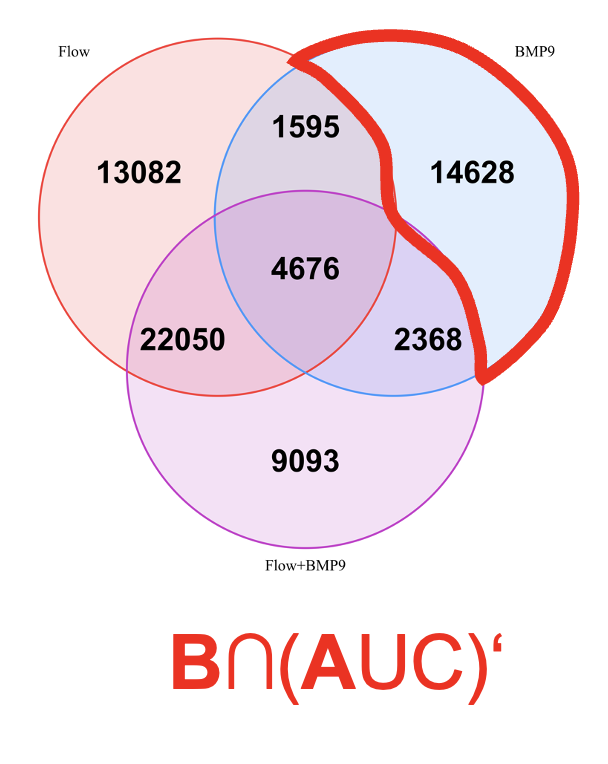

In [72]:
library("IRdisplay")
display_png(file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/images/bmp9.png")  
#![image](/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/images/bmp9.png)


In [73]:
# first make the comparison between BMP9 and Flow+ BMP9 : find the regions that is specific to only BMP9 stimulation
stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9=  subsetByOverlaps(stat_bmp9_VS_stat_cont_gr, flow_bmp9_VS_stat_cont_gr, invert=T)


In [103]:
head(stat_bmp9_VS_stat_cont_df)

,seqnames,start,end,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth,regions
,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,chr1,910190,910591,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336,chr1_910190_910591_SAMD11
2,chr1,921022,921423,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504,chr1_921022_921423_SAMD11
3,chr1,923802,924203,SAMD11,-1.1629176,2.520596e-07,2.974507e-05,7.101950,6.210326,7.648899,chr1,923926,923927,ENSG00000187634.11,0,+,0,chr1_923802_924203_SAMD11
4,chr1,925466,925867,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540,chr1_925466_925867_SAMD11
5,chr1,941593,941994,NOC2L,-0.6583104,1.240086e-03,1.926971e-02,6.970025,6.486176,7.331718,chr1,959309,959310,ENSG00000188976.10,0,-,17316,chr1_941593_941994_NOC2L
6,chr1,942434,942835,NOC2L,-0.8610278,4.864304e-05,1.897477e-03,6.774891,6.180369,7.194684,chr1,959309,959310,ENSG00000188976.10,0,-,16475,chr1_942434_942835_NOC2L


In [77]:
head(stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9)

GRanges object with 6 ranges and 14 metadata columns:
      seqnames        ranges strand |          V4        V5          V6
         <Rle>     <IRanges>  <Rle> | <character> <numeric>   <numeric>
  [1]     chr1 910190-910591      * |      SAMD11 -0.881419 6.86136e-04
  [2]     chr1 921022-921423      * |      SAMD11 -1.208391 1.88144e-08
  [3]     chr1 923802-924203      * |      SAMD11 -1.162918 2.52060e-07
  [4]     chr1 925466-925867      * |      SAMD11 -0.920878 4.59463e-05
  [5]     chr1 941593-941994      * |       NOC2L -0.658310 1.24009e-03
  [6]     chr1 942434-942835      * |       NOC2L -0.861028 4.86430e-05
               V7        V8        V9       V10         V11       V12       V13
        <numeric> <numeric> <numeric> <numeric> <character> <integer> <integer>
  [1] 1.27823e-02   5.32775   4.57407   5.82029        chr1    923926    923927
  [2] 3.69454e-06   6.95248   6.06909   7.49638        chr1    923926    923927
  [3] 2.97451e-05   7.10195   6.21033   7.64890   

In [86]:
# now, find the regions that are distict from those of Flow:
stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9__VS__flow_cont_VS_stat_cont =  subsetByOverlaps(stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9, flow_cont_VS_stat_cont_gr, invert=T)


In [88]:
head(stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9__VS__flow_cont_VS_stat_cont)

GRanges object with 6 ranges and 14 metadata columns:
      seqnames          ranges strand |          V4        V5          V6
         <Rle>       <IRanges>  <Rle> | <character> <numeric>   <numeric>
  [1]     chr1   910190-910591      * |      SAMD11 -0.881419 6.86136e-04
  [2]     chr1   921022-921423      * |      SAMD11 -1.208391 1.88144e-08
  [3]     chr1   925466-925867      * |      SAMD11 -0.920878 4.59463e-05
  [4]     chr1   941593-941994      * |       NOC2L -0.658310 1.24009e-03
  [5]     chr1   942434-942835      * |       NOC2L -0.861028 4.86430e-05
  [6]     chr1 1021041-1021442      * |        AGRN -0.841736 2.28145e-05
               V7        V8        V9       V10         V11       V12       V13
        <numeric> <numeric> <numeric> <numeric> <character> <integer> <integer>
  [1] 1.27823e-02   5.32775   4.57407   5.82029        chr1    923926    923927
  [2] 3.69454e-06   6.95248   6.06909   7.49638        chr1    923926    923927
  [3] 1.82176e-03   6.20330   5.52

In [114]:
# convert to df

only_BMP9_regions_from_all_comparisons_df= data.frame(stat_bmp9_VS_stat_cont_VS_flow_bmp9_VS_stat_cont_only_bmp9__VS__flow_cont_VS_stat_cont)
colnames(only_BMP9_regions_from_all_comparisons_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")
head(only_BMP9_regions_from_all_comparisons_df)


,seqnames,start,end,width,strand,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,910190,910591,402,*,SAMD11,-0.8814186,6.861363e-04,1.278233e-02,5.327754,4.574066,5.820289,chr1,923926,923927,ENSG00000187634.11,0,+,13336
2,chr1,921022,921423,402,*,SAMD11,-1.2083906,1.881436e-08,3.694537e-06,6.952478,6.069092,7.496376,chr1,923926,923927,ENSG00000187634.11,0,+,2504
3,chr1,925466,925867,402,*,SAMD11,-0.9208781,4.594627e-05,1.821763e-03,6.203300,5.521827,6.664275,chr1,923926,923927,ENSG00000187634.11,0,+,1540
4,chr1,941593,941994,402,*,NOC2L,-0.6583104,1.240086e-03,1.926971e-02,6.970025,6.486176,7.331718,chr1,959309,959310,ENSG00000188976.10,0,-,17316
5,chr1,942434,942835,402,*,NOC2L,-0.8610278,4.864304e-05,1.897477e-03,6.774891,6.180369,7.194684,chr1,959309,959310,ENSG00000188976.10,0,-,16475
6,chr1,1021041,1021442,402,*,AGRN,-0.8417360,2.281448e-05,1.057730e-03,7.382121,6.801775,7.794845,chr1,1020121,1020122,ENSG00000188157.14,0,+,920


In [115]:
# make a unique identifier:

only_BMP9_regions_from_all_comparisons_df2 = only_BMP9_regions_from_all_comparisons_df
only_BMP9_regions_from_all_comparisons_df2["regions"] = paste(only_BMP9_regions_from_all_comparisons_df$seqnames, only_BMP9_regions_from_all_comparisons_df$start, only_BMP9_regions_from_all_comparisons_df$end,only_BMP9_regions_from_all_comparisons_df$gene_symbol,sep="_" )


In [116]:
write.table( x = only_BMP9_regions_from_all_comparisons_df2, file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/only_BMP9_regions_from_all_comparisons_df2_annotated.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [117]:
write.table(only_BMP9_regions_from_all_comparisons_df2, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/only_BMP9_regions_from_all_comparisons_df2_annotated.bed", quote=F, sep="\t", row.names=F, col.names=F)


## next, we want to find the regions that are common in bmp9 and bmp9+flow

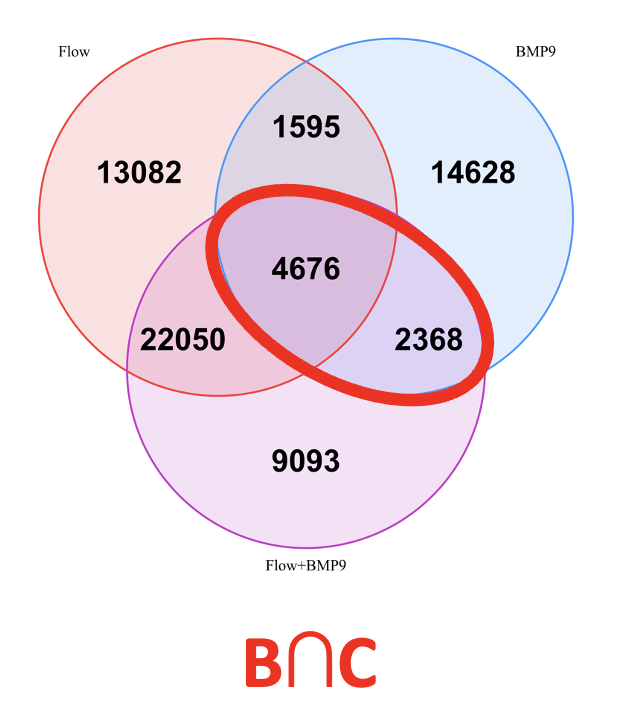

In [93]:
library("IRdisplay")
display_png(file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/images/bmp9_and_bmp9andflow.png")  
#![image](/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/images/bmp9.png)


In [94]:
# find the regions that are common between only BMP9 stimulation and BMP9 stimulation
stat_bmp9_VS_stat_cont__VS__flow_bmp9_VS_stat_cont=  subsetByOverlaps(stat_bmp9_VS_stat_cont_gr, flow_bmp9_VS_stat_cont_gr)


In [96]:
head(stat_bmp9_VS_stat_cont__VS__flow_bmp9_VS_stat_cont)

GRanges object with 6 ranges and 14 metadata columns:
      seqnames          ranges strand |          V4        V5          V6
         <Rle>       <IRanges>  <Rle> | <character> <numeric>   <numeric>
  [1]     chr1 1059451-1059852      * |      RNF223 -0.705584 2.58557e-04
  [2]     chr1 1079385-1079786      * |      RNF223 -0.875508 1.38793e-05
  [3]     chr1 1179347-1179748      * |      TTLL10 -0.952930 6.04248e-04
  [4]     chr1 1212809-1213210      * |     TNFRSF4 -0.603948 5.08238e-04
  [5]     chr1 1243376-1243777      * |    C1QTNF12 -1.023589 1.18866e-04
  [6]     chr1 1925619-1926020      * |      TMEM52 -0.738410 3.14711e-03
               V7        V8        V9       V10         V11       V12       V13
        <numeric> <numeric> <numeric> <numeric> <character> <integer> <integer>
  [1] 0.006470360   8.51874   8.02792   8.88431        chr1   1074307   1074308
  [2] 0.000723632   8.55799   7.94766   8.98554        chr1   1074307   1074308
  [3] 0.011753564   4.33634   3.44

In [118]:
# convert to df

common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df= data.frame(stat_bmp9_VS_stat_cont__VS__flow_bmp9_VS_stat_cont)
colnames(common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df)= c("seqnames","start","end","width","strand", "gene_symbol","fold_change_stat_bmp9_VS_stat_cont","pvalue_stat_bmp9_VS_stat_cont","FDR_stat_bmp9_VS_stat_cont","Conc","Conc_stat_bmp9","Conc_stat_cont", "TSS_seq", "TSS_start", "TSS_end", "TSS_ENSEMBL","TSS_interval", "TSS_strand", "TSS_sth")
head(common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df)


,seqnames,start,end,width,strand,gene_symbol,fold_change_stat_bmp9_VS_stat_cont,pvalue_stat_bmp9_VS_stat_cont,FDR_stat_bmp9_VS_stat_cont,Conc,Conc_stat_bmp9,Conc_stat_cont,TSS_seq,TSS_start,TSS_end,TSS_ENSEMBL,TSS_interval,TSS_strand,TSS_sth
,<fct>,<int>,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,chr1,1059451,1059852,402,*,RNF223,-0.7055841,2.585572e-04,0.0064703603,8.518745,8.027916,8.884307,chr1,1074307,1074308,ENSG00000237330.2,0,-,14456
2,chr1,1079385,1079786,402,*,RNF223,-0.8755083,1.387927e-05,0.0007236323,8.557989,7.947661,8.985544,chr1,1074307,1074308,ENSG00000237330.2,0,-,5078
3,chr1,1179347,1179748,402,*,TTLL10,-0.9529298,6.042480e-04,0.0117535644,4.336342,3.445011,4.883183,chr1,1173882,1173883,ENSG00000162571.13,0,+,5465
4,chr1,1212809,1213210,402,*,TNFRSF4,-0.6039477,5.082381e-04,0.0104108207,7.774293,7.371895,8.088585,chr1,1214138,1214139,ENSG00000186827.10,0,-,929
5,chr1,1243376,1243777,402,*,C1QTNF12,-1.0235891,1.188662e-04,0.0036659826,4.931899,4.031153,5.482199,chr1,1246722,1246723,ENSG00000184163.3,0,-,2946
6,chr1,1925619,1926020,402,*,TMEM52,-0.7384102,3.147106e-03,0.0356983378,5.350021,4.739462,5.777688,chr1,1919273,1919274,ENSG00000178821.12,0,-,6346


In [119]:
# make a unique identifier:

common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2 = common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df
common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2["regions"] = paste(common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df$seqnames, common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df$start, common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df$end,common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df$gene_symbol,sep="_" )


In [120]:
write.table( x = common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2, file = "/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2.csv", sep=",", col.names=TRUE, row.names=FALSE, quote=FALSE )


In [122]:
write.table(common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2, file="/project/Mechanogenomics_data/ATACseq_analysis/DiffAcc/results/Q_23March23/common_regions_between_stat_bmp9_VS_stat_cont__AND__flow_bmp9_VS_stat_cont_df2.bed", quote=F, sep="\t", row.names=F, col.names=F)


# upset plot -- uses setDiff but we need subsetbyoverlps

In [45]:
#install.packages("UpSetR")
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [74]:
ranges_list = list(flow = flow_cont_VS_stat_cont_gr,
                    bmp9=stat_bmp9_VS_stat_cont_gr,
                  flow_and_bmp9 = flow_bmp9_VS_stat_cont_gr)



In [76]:
m = make_comb_mat(ranges_list)#,mode = "intersect")
cs = comb_size(m)

In [95]:
cs

111     110     101     011     100     010     001 
1881236  643690 8870524  952713 5262774 5889109 3657079

In [93]:
m

flow,1,1,1,0,1,0,0
bmp9,1,1,0,1,0,1,0
flow_and_bmp9,1,0,1,1,0,0,1


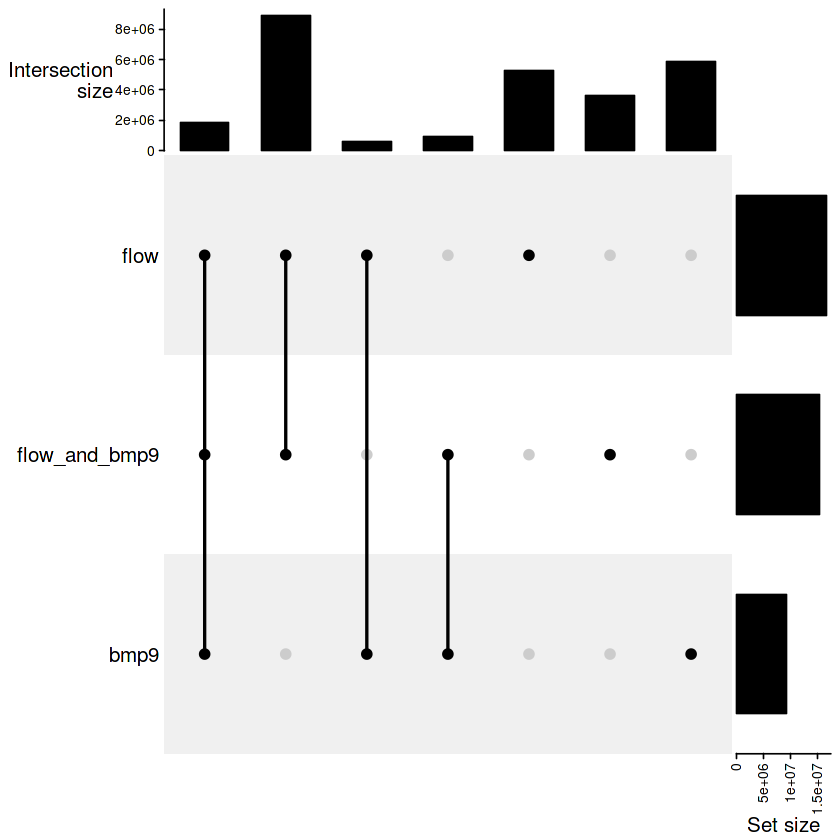

In [83]:
UpSet(m, top_annotation = upset_top_annotation(m, add_numbers = TRUE),
    right_annotation = upset_right_annotation(m, bb = TRUE))

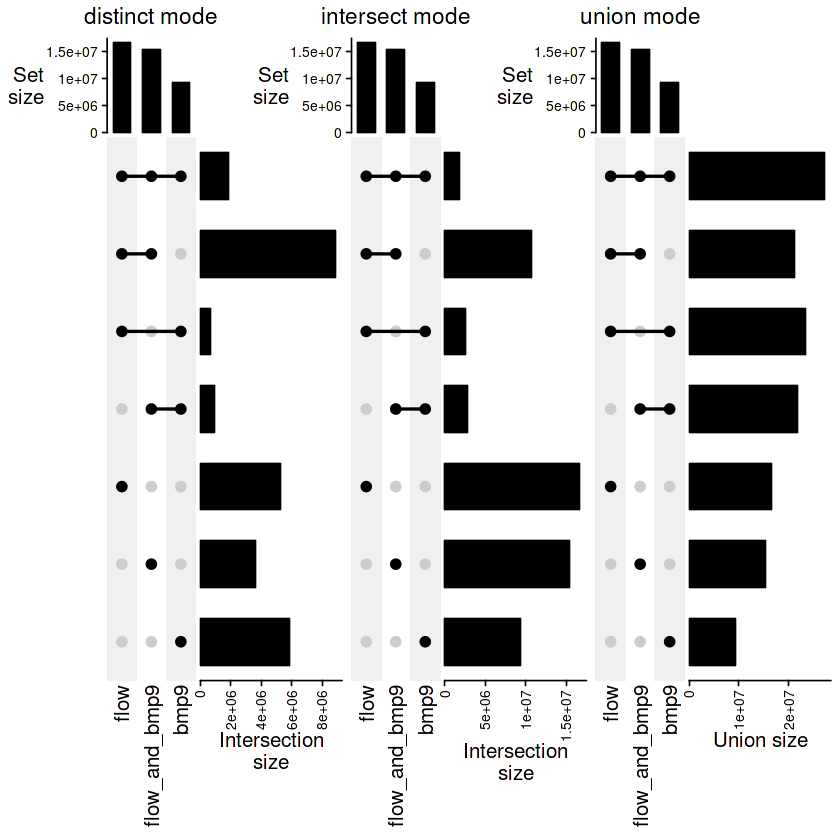

In [84]:
m1 = make_comb_mat(ranges_list, mode = "distinct")
m2 = make_comb_mat(ranges_list, mode = "intersect")
m3 = make_comb_mat(ranges_list, mode = "union")
UpSet(t(m1), column_title = "distinct mode") +
    UpSet(t(m2), column_title = "intersect mode") +
    UpSet(t(m3), column_title = "union mode")

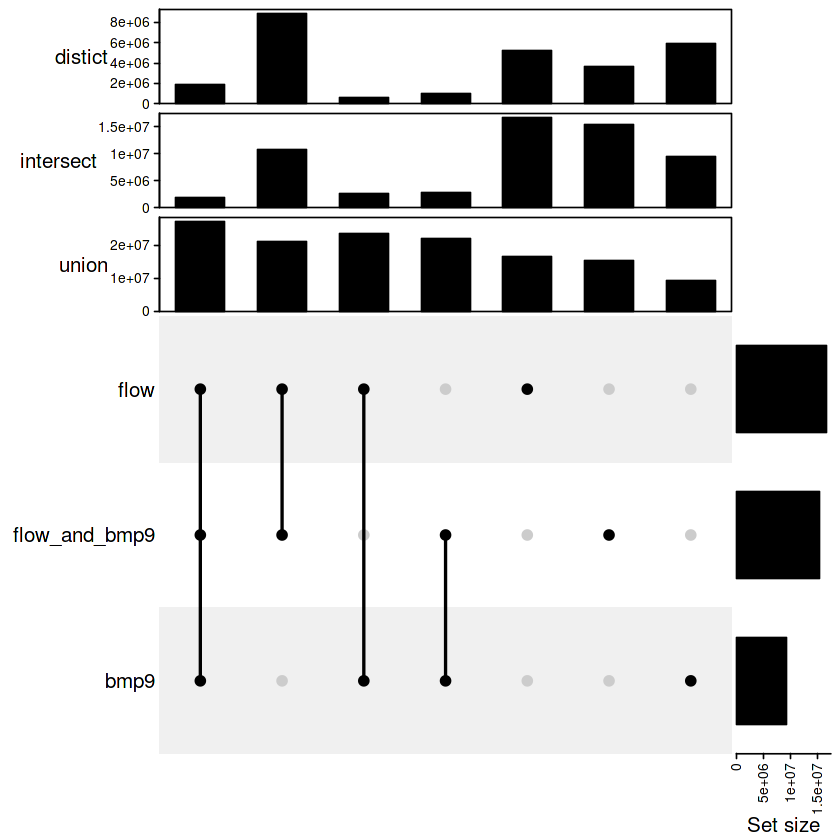

In [89]:
top_ha = HeatmapAnnotation(
    "distict" = anno_barplot(comb_size(m1), 
        gp = gpar(fill = "black"), height = unit(2, "cm")), 
    "intersect" = anno_barplot(comb_size(m2), 
        gp = gpar(fill = "black"), height = unit(2, "cm")), 
    "union" = anno_barplot(comb_size(m3), 
        gp = gpar(fill = "black"), height = unit(2, "cm")), 
    gap = unit(2, "mm"), annotation_name_side = "left", annotation_name_rot = 0)
# the same for using m2 or m3
UpSet(m1, top_annotation = top_ha)


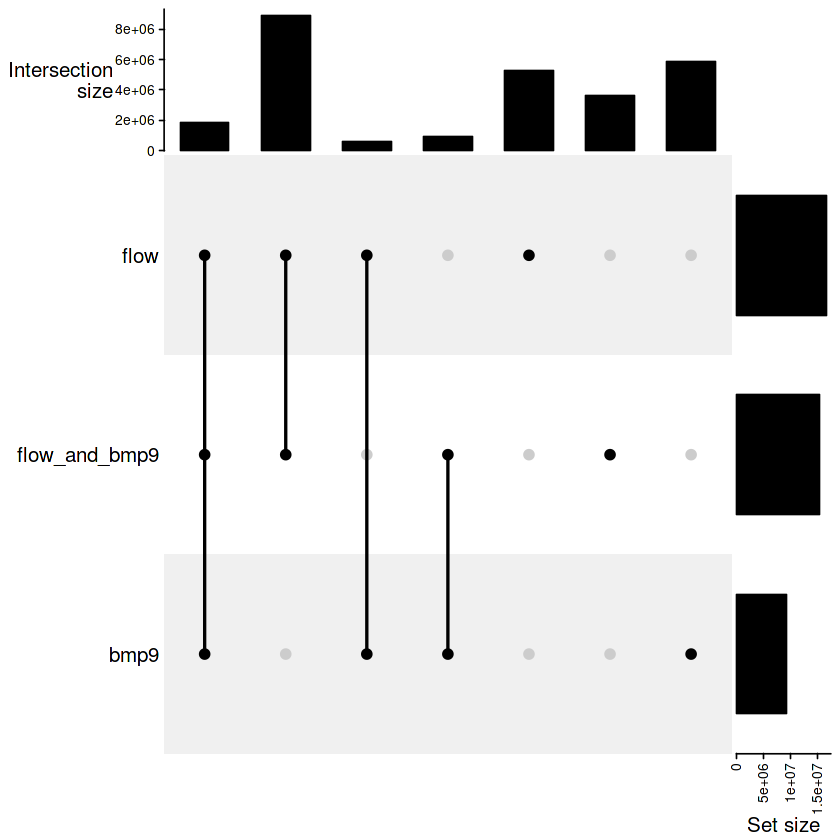

In [81]:
ht = UpSet(m, top_annotation = upset_top_annotation(m,add_numbers = TRUE),right_annotation = upset_right_annotation(m, add_numbers = TRUE))
ht = draw(ht)

In [78]:
extract_comb(m, "001")

GRanges object with 9087 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1       932837-933238      *
     [2]     chr1     1005209-1005610      *
     [3]     chr1     1333540-1333941      *
     [4]     chr1     1614193-1614594      *
     [5]     chr1     1919258-1919659      *
     ...      ...                 ...    ...
  [9083]     chrX 153801792-153802193      *
  [9084]     chrX 153910989-153911390      *
  [9085]     chrX 154002137-154002538      *
  [9086]     chrX 154370420-154370821      *
  [9087]     chrX 154730150-154730551      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [70]:
comb_size(m)

111      110      101      011      100      010      001 
 1881236  2524926 10751760  2833949 16670284  9371974 15369592

In [73]:
extract_comb(m, "011")

GRanges object with 2368 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1     1212809-1213210      *
     [2]     chr1     1925619-1926020      *
     [3]     chr1     2148668-2149069      *
     [4]     chr1     2279160-2279561      *
     [5]     chr1     2863158-2863559      *
     ...      ...                 ...    ...
  [2364]     chrX 134431890-134432291      *
  [2365]     chrX 141314428-141314829      *
  [2366]     chrX 153491729-153492130      *
  [2367]     chrX 154057099-154057500      *
  [2368]     chrX 154063249-154063650      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

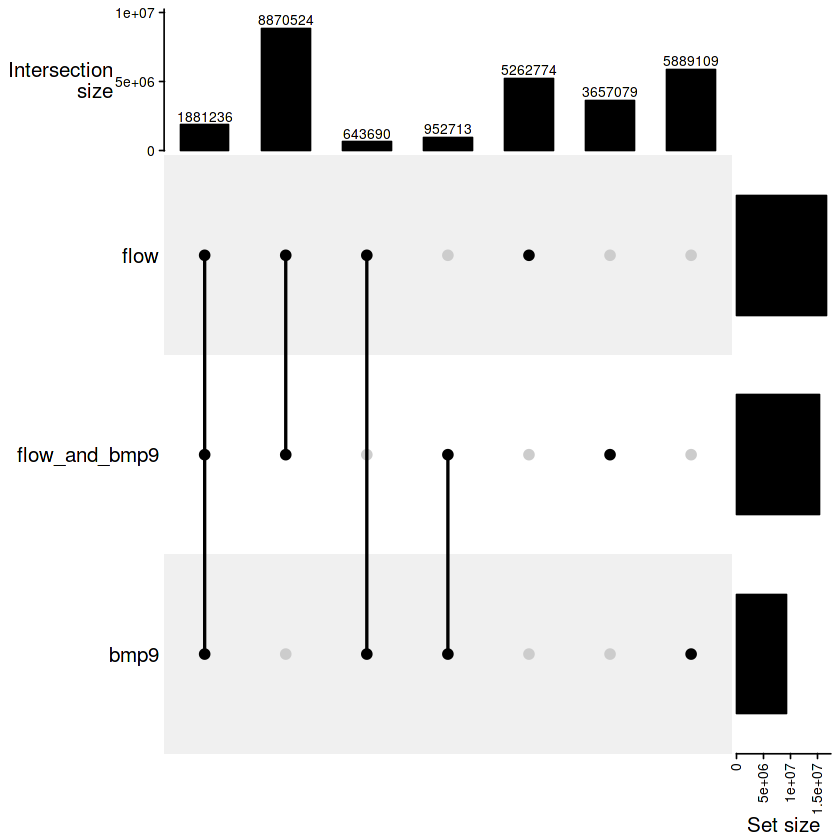

In [92]:
m = make_comb_mat(ranges_list)#,mode = "intersect")
cs = comb_size(m)
ht = UpSet(m, top_annotation = upset_top_annotation(m, ylim = c(0, 1.1*max(cs))))
ht = draw(ht)
co = column_order(ht)
decorate_annotation("intersection_size", {
    grid.text(cs[co], x = seq_along(cs), y = unit(cs[co], "native") + unit(2, "pt"), 
        default.units = "native", just = "bottom", gp = gpar(fontsize = 8))
})


# nc = ncol(m)
# decorate_annotation("Intersection\nsize", {
#     grid.text(cs[co], 
#         x = 1:nc, 
#         y = unit(cs[co], "native") + unit(1, "mm"), 
#         gp = gpar(fontsize = 5), 
#         just = "bottom",
#         default.units = "native")
# })